In [1]:
import tensorflow as tf
tf.enable_eager_execution()



In [2]:
from flux.datasets.vqa.visual7w import Visual7W_Pointing, Visual7W_Telling

[Flux] Initializing...


In [3]:
from flux.backend.globals import DATA_STORE
import json, os

In [ ]:
# pointing = Visual7W_Pointing(force_rebuild=False)

In [13]:
telling = Visual7W_Telling(force_rebuild=False)

[Flux] Building Dataset telling


In [25]:
telling_images = telling.train_db[0].batch(1)
telling_dataset = telling.train_db[1].batch(1)
img_id = 0
tl_images_iterator = tf.contrib.eager.Iterator(telling_images)
tl_dataset_iterator = tf.contrib.eager.Iterator(telling_dataset)

In [26]:
def decode_text(array):
    dt = filter(lambda x: x!="", [telling.dictionary.word_dictionary_rev[w] for w in array])
    return " ".join(list(dt))

In [27]:
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np
%matplotlib inline


What is written on the white square on the bus ?
["Donald 's Donuts .", "Mac 's Macaroni Hut .", "Smith 's Smothered Chicken Tenders ."]
Fox 's Ginger Biscuits .


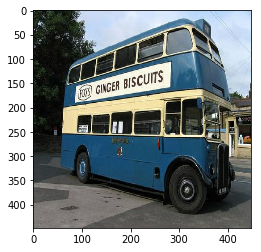

What kind of bus is this ?
['City bus .', 'School bus .', 'Party bus .']
Double decker bus .


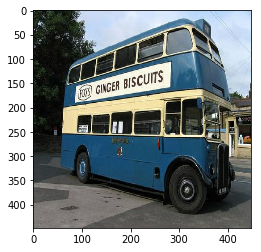

When is this scene taking place ?
['Night time .', 'Evening .', 'Morning .']
Day time .


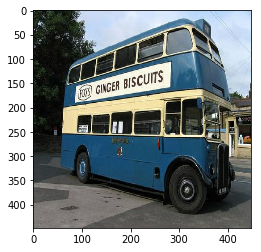

What is the number on the very top of the bus ?
['Eight nine .', 'Sixty five .', 'Forty two .']
Seventy four .


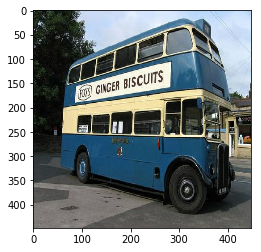

How many windows are visible on the side of the bus ?
['10 .', '28 .', '22 .']
11 .


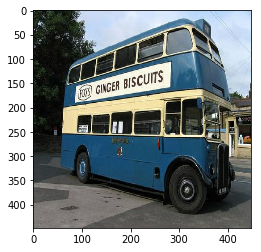

In [28]:
for i in range(5):
    data = next(tl_dataset_iterator)
    qwe, qce, ql, aw, ace, al, \
    m1we, m1ce, m2we, m2ce, m3we, m3ce, \
    ml, qa_id, q_type, new_img_id = data 
    new_img_id = new_img_id.numpy()[0][0]
    if new_img_id != img_id:
        item = next(tl_images_iterator)
        image, image_id = item
        image = image[...,::-1]
        image_id = image_id.numpy()[0]
        image = image.numpy()[0]
        img_id = new_img_id
    assert(image_id == img_id)
    qwe = qwe.numpy()[0]
    aw = aw.numpy()[0]
    m1we = m1we.numpy()[0]
    m2we = m2we.numpy()[0]
    m3we = m3we.numpy()[0]
    
    question = decode_text(qwe)
    mlt_choice = [decode_text(m1we), decode_text(m2we), decode_text(m3we)]
    answer = decode_text(aw)
    
    print(question)
    print(mlt_choice)
    print(answer)
    plt.imshow(image)
    plt.show()